# Ch. 7 - Introduction to Keras

![Keras Logo](https://storage.googleapis.com/aibootcamp/Week%202/assets/keras-logo-2018-large-1200.png)

In the last week we built a neural network from scratch using nothing but raw python and the matrix library numpy. While it is a great way to understand the inner workings of neural networks, it in not very practical to always implement your own learning algorithms from scratch. In fact, much of the progress in machine learning in recent years was archived because reliable, high performance and easy to use libraries where created. For the rest of the course we will be using [Keras](https://keras.io/). Keras is a high level neural network API that works on top of other deep learning libraries. We will be using Keras in combination with Googles [TensorFlow](https://www.tensorflow.org/), a very popular deep learning library. You can imagine Keras as a front end which you as a developer use while TensorFlow handles all the maths in the background. This setup allows us to harness the high performance of TensorFlow while at the same time iterating quickly with an easy to use API.

But as always, before we start, lets set our random seed so that we always obtain the same results.

In [4]:
# Set seed with numpy
import numpy as np
np.random.seed(42)

And how could we live without pyplot?

In [5]:
import matplotlib.pyplot as plt

## MNIST with Keras
Perhaps the best way to understand how Keras works is by just getting started with it. Last weeks challenge was the MNIST dataset, a collection of hand written digits. In this introduction we are going to use the same dataset to get to know Keras.

In [6]:
from keras.models import Sequential

Keras offers two basic ways to build models, the [sequential model](https://keras.io/getting-started/sequential-model-guide/), in which layers are just stacked on top of each other and the [functional API](https://keras.io/getting-started/functional-api-guide/) that allows to create more complex structures. For most of the course we will be using the sequential model. As you also can see from the import statement, Keras is using TensorFlow as a back end. Next up we need to import some modules we use to create our network:

In [7]:
from keras.layers import Dense

We just imported the dense layer module and the activation function module. A dense layer is simply a layer in which every node is fully connected to all nodes from the previous layers. This was the case in all neural networks we have built so far but there are other possibilities, too. We will explore them later. Keras also provides a utility to directly load some common machine learning datasets.

In [8]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

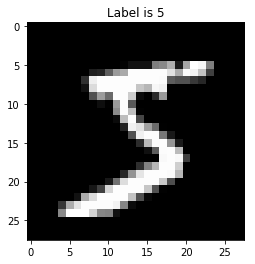

In [9]:
# Visualize MNIST
pixels = X_train[0]
label = y_train[0]
# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()

For onehot encoding we will continue to use SciKit Learn

In [6]:
from sklearn.preprocessing import OneHotEncoder
# Generate one hot encoding

# Reshape from array to vector
y_train = y_train.reshape(y_train.shape[0],1)
# Generate one hot encoding
enc = OneHotEncoder()
onehot = enc.fit_transform(y_train)
# Convert to numpy vector
y_train = onehot.toarray()

# Reshape from array to vector
y_test = y_test.reshape(y_test.shape[0],1)
# Generate one hot encoding
enc = OneHotEncoder()
onehot = enc.fit_transform(y_test)
# Convert to numpy vector
y_test = onehot.toarray()

We also have to reshape the input X, which is a stack of matrices in the raw data into a stack of vectors.

In [7]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] * X_test.shape[2])

Now it is time to build our model! We initialize the model building process like this:

In [8]:
model = Sequential()

Now adding layers can be done with a simple ```.add()```

In [9]:
# For the first layer we have to specify the input dimensions
model.add(Dense(units=320, input_dim=784, activation='tanh'))

model.add(Dense(units=160, activation='tanh'))

model.add(Dense(units=10, activation='softmax'))


Now we have to compile the model, turning it into a [static graph TensorFlow can execute](https://stackoverflow.com/questions/46154189/what-is-the-difference-of-static-computational-graphs-in-tensorflow-and-dynamic). In the compile statement we need to specify three things:
- The loss function: Here categorical crossentropy
- The optimization algorithm: Here vanilla stochastic gradient descent
- Metrics we want to track: Here just the accuracy

You might have noticed that we have not provided the learning rate. If we just specify what type of optimizer we would like to use, without hyper parameters for that optimizer, Keras will choose default hyper parameters for us. In this case, the learning rate is [set to 0.01](https://keras.io/optimizers/#sgd), we will later see how to set optimizers with different hyper parameters.

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Now there is only the training left to be done.

In [11]:
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 7s - loss: 0.5586 - acc: 0.8432     
Epoch 2/10
60000/60000 [==============================] - 7s - loss: 0.3943 - acc: 0.8842     
Epoch 3/10
60000/60000 [==============================] - 7s - loss: 0.3757 - acc: 0.8862     
Epoch 4/10
60000/60000 [==============================] - 7s - loss: 0.3419 - acc: 0.8956     
Epoch 5/10
60000/60000 [==============================] - 7s - loss: 0.3384 - acc: 0.8976     
Epoch 6/10
60000/60000 [==============================] - 8s - loss: 0.3427 - acc: 0.8941     
Epoch 7/10
60000/60000 [==============================] - 9s - loss: 0.3504 - acc: 0.8920     
Epoch 8/10
60000/60000 [==============================] - 7s - loss: 0.3267 - acc: 0.8993     
Epoch 9/10
60000/60000 [==============================] - 7s - loss: 0.2985 - acc: 0.9085     
Epoch 10/10
60000/60000 [==============================] - 7s - loss: 0.2928 - acc: 0.9099     


You will probably have noticed that this runs quite a bit faster than when we implemented our own neural network in numpy. That is because TensorFlow, which handles all the math operations is optimized for exactly these kinds of operations. Another advantage is that TensorFlow can run on a graphics processing unit (GPU). GPUs where originally invented to render computer game graphics, but it turned out that their architecture was ideal for deep learning. Much of deep learnings recent progress is owed to the fact that powerful GPUs and tools to use them for things other than graphics came on the market.

We can visualize how our model made progress through the history we obtained from training:

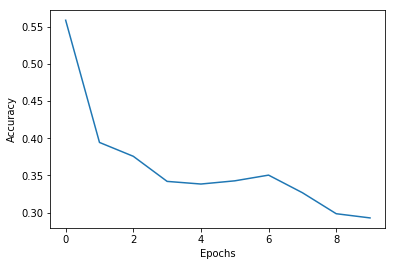

In [12]:
# Plot the loss development
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

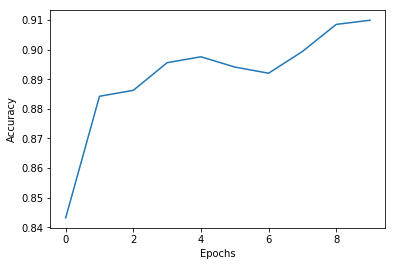

In [13]:
# Plot the accuracy development
plt.plot(history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

To see how good our model actually is or weather it overfits the training set, let's evaluate it on the test set:

In [14]:
model.evaluate(x=X_test,y=y_test)

10000/10000 [==============================] - 0s     


[0.28988774968981745, 0.91190000000000004]

The first number in this output is the loss over the training set, the second the accuracy. We have achieved 90% very good!

## Setting optimizer hyper parameters
To set optimizer hyper parameters manually, we have to import the optimizer itself and then add it into our model. Like this:

In [15]:
from keras import optimizers

We are going to set the learning rate very low here (0.001) to show that the model learns much more slowly now

In [16]:
# Same Sequential model
model = Sequential()
# Add layers
model.add(Dense(units=320, input_dim=784, activation='tanh'))
model.add(Dense(units=160, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
# New compile statement
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

In [17]:
# Training should be much more slow now
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
history = model.fit(X_train, y_train, epochs=10, batch_size=2048)

Epoch 1/10
60000/60000 [==============================] - 1s - loss: 2.5164 - acc: 0.1128     
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 2.2299 - acc: 0.2035     
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 2.0206 - acc: 0.3008     
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 1.8544 - acc: 0.3823     
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 1.7180 - acc: 0.4472     
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 1.6038 - acc: 0.4993     
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 1.5075 - acc: 0.5413     
Epoch 8/10
60000/60000 [==============================] - 1s - loss: 1.4246 - acc: 0.5763     
Epoch 9/10
60000/60000 [==============================] - 1s - loss: 1.3523 - acc: 0.6057     
Epoch 10/10
60000/60000 [==============================] - 1s - loss: 1.2896 - acc: 0.6302     


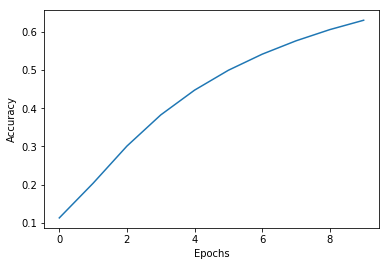

In [18]:
plt.plot(history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [19]:
model.evaluate(x=X_test,y=y_test)

 9632/10000 [===========================>..] - ETA: 0s

[1.2640684884071349, 0.63839999999999997]

As you can see, the model took a bit longer in the beginning but then achieved a better result: 91.9% accuracy!

## Loading and saving models
Training models is hard work and requires a lot of computing power, so if we could not save the fruits of our work somehow we would be in trouble. Luckily, [loading and saving models with Keras](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) is quite simple. We can save a model as an [H5 data file](http://www.h5py.org/) like this:

In [23]:
model.save('my_model.h5')

Loading a model works like this:

In [24]:
# First we need to import the corresponding function
from keras.models import load_model

In [25]:
model = load_model('my_model.h5')

After we have loaded a model from the h5 file we get the exact same keras model that we saved back.

## Summary
And thus concludes our brief introduction to Keras. You have seen how to set up a simple model, how to set hyper parameters, and how to make Keras work with TensorBoard. To get more used to its sequential model, try implementing a different model for MNIST. Good luck!